# Simsets: Time series demo

Pull a random timeseries from the timeseries endpoint

In [14]:
# Get json from url
import requests
import json
import pandas as pd
import seaborn as sns

url = "https://simsets-118f49ff0b32.herokuapp.com/timeseries?num_time_periods=1095"
response = requests.get(url)
response_json = response.json()

observed_df = pd.DataFrame(json.loads(response_json['observed']))
observed_df['date'] = pd.to_datetime(observed_df['date'])

## Plot the y variable

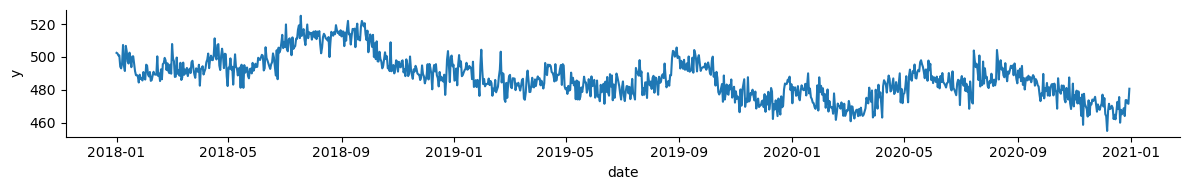

In [15]:
_ = sns.relplot(
    data=observed_df,
    x="date", y="y",
    kind="line", 
    height=2, aspect=6,
)


## Plot the observed variables

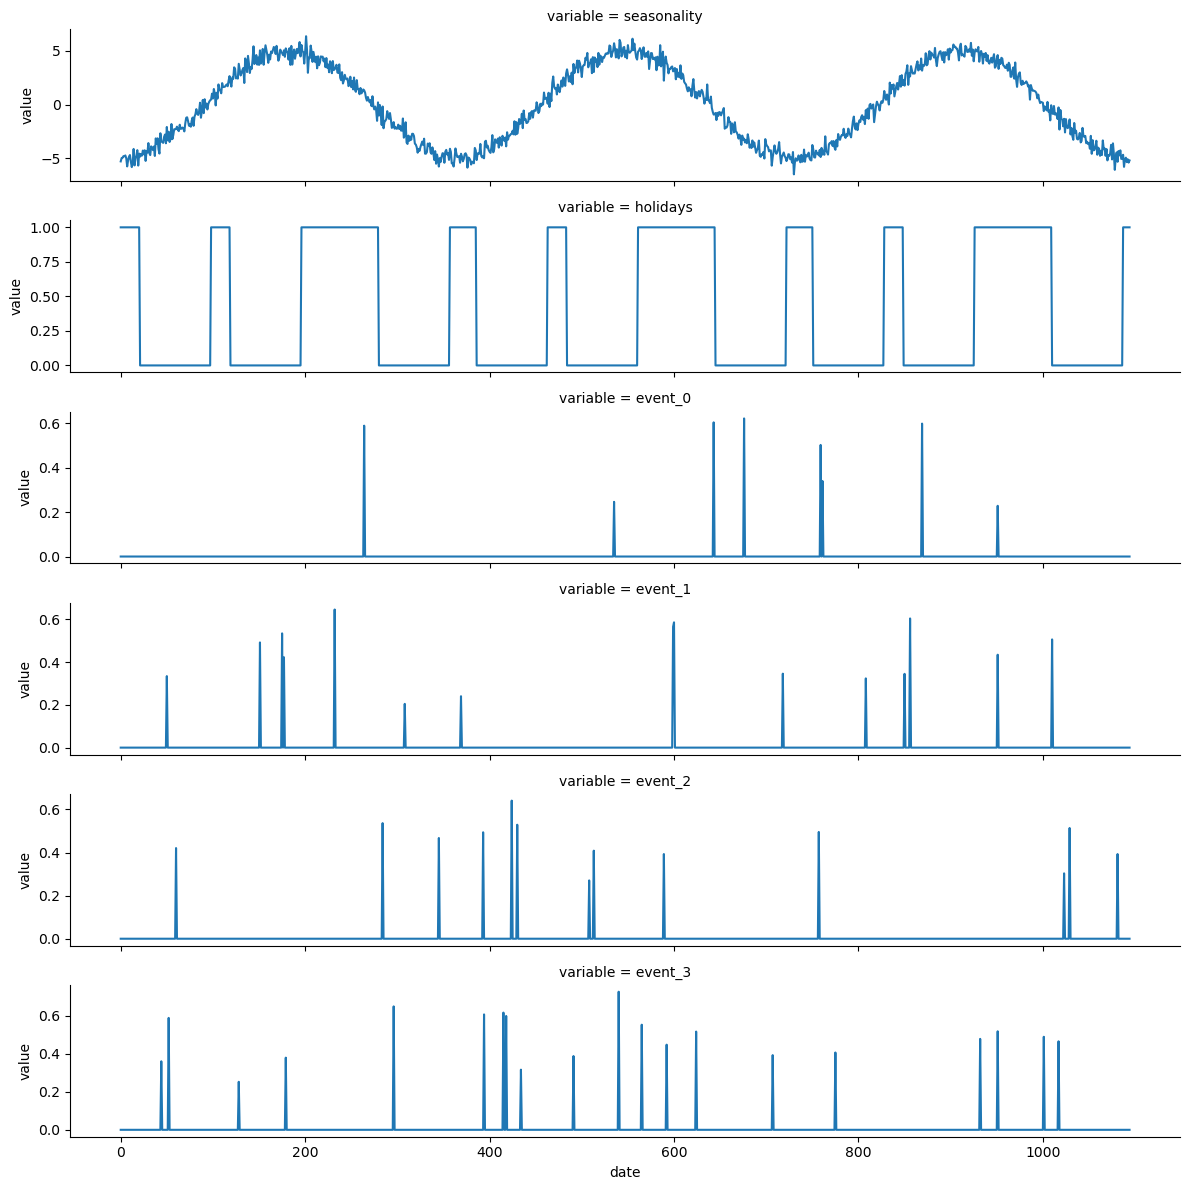

In [16]:
for_stacking = observed_df.drop(columns=['date', 'y'])
for_stacking = for_stacking.stack().reset_index()
for_stacking.columns = ['date', 'variable', 'value']

_ = sns.relplot(
    data=for_stacking,
    x="date", y="value", row="variable",
    kind="line", 
    height=2, aspect=6, facet_kws=dict(sharey=False),
)


## Plot the true decomposition

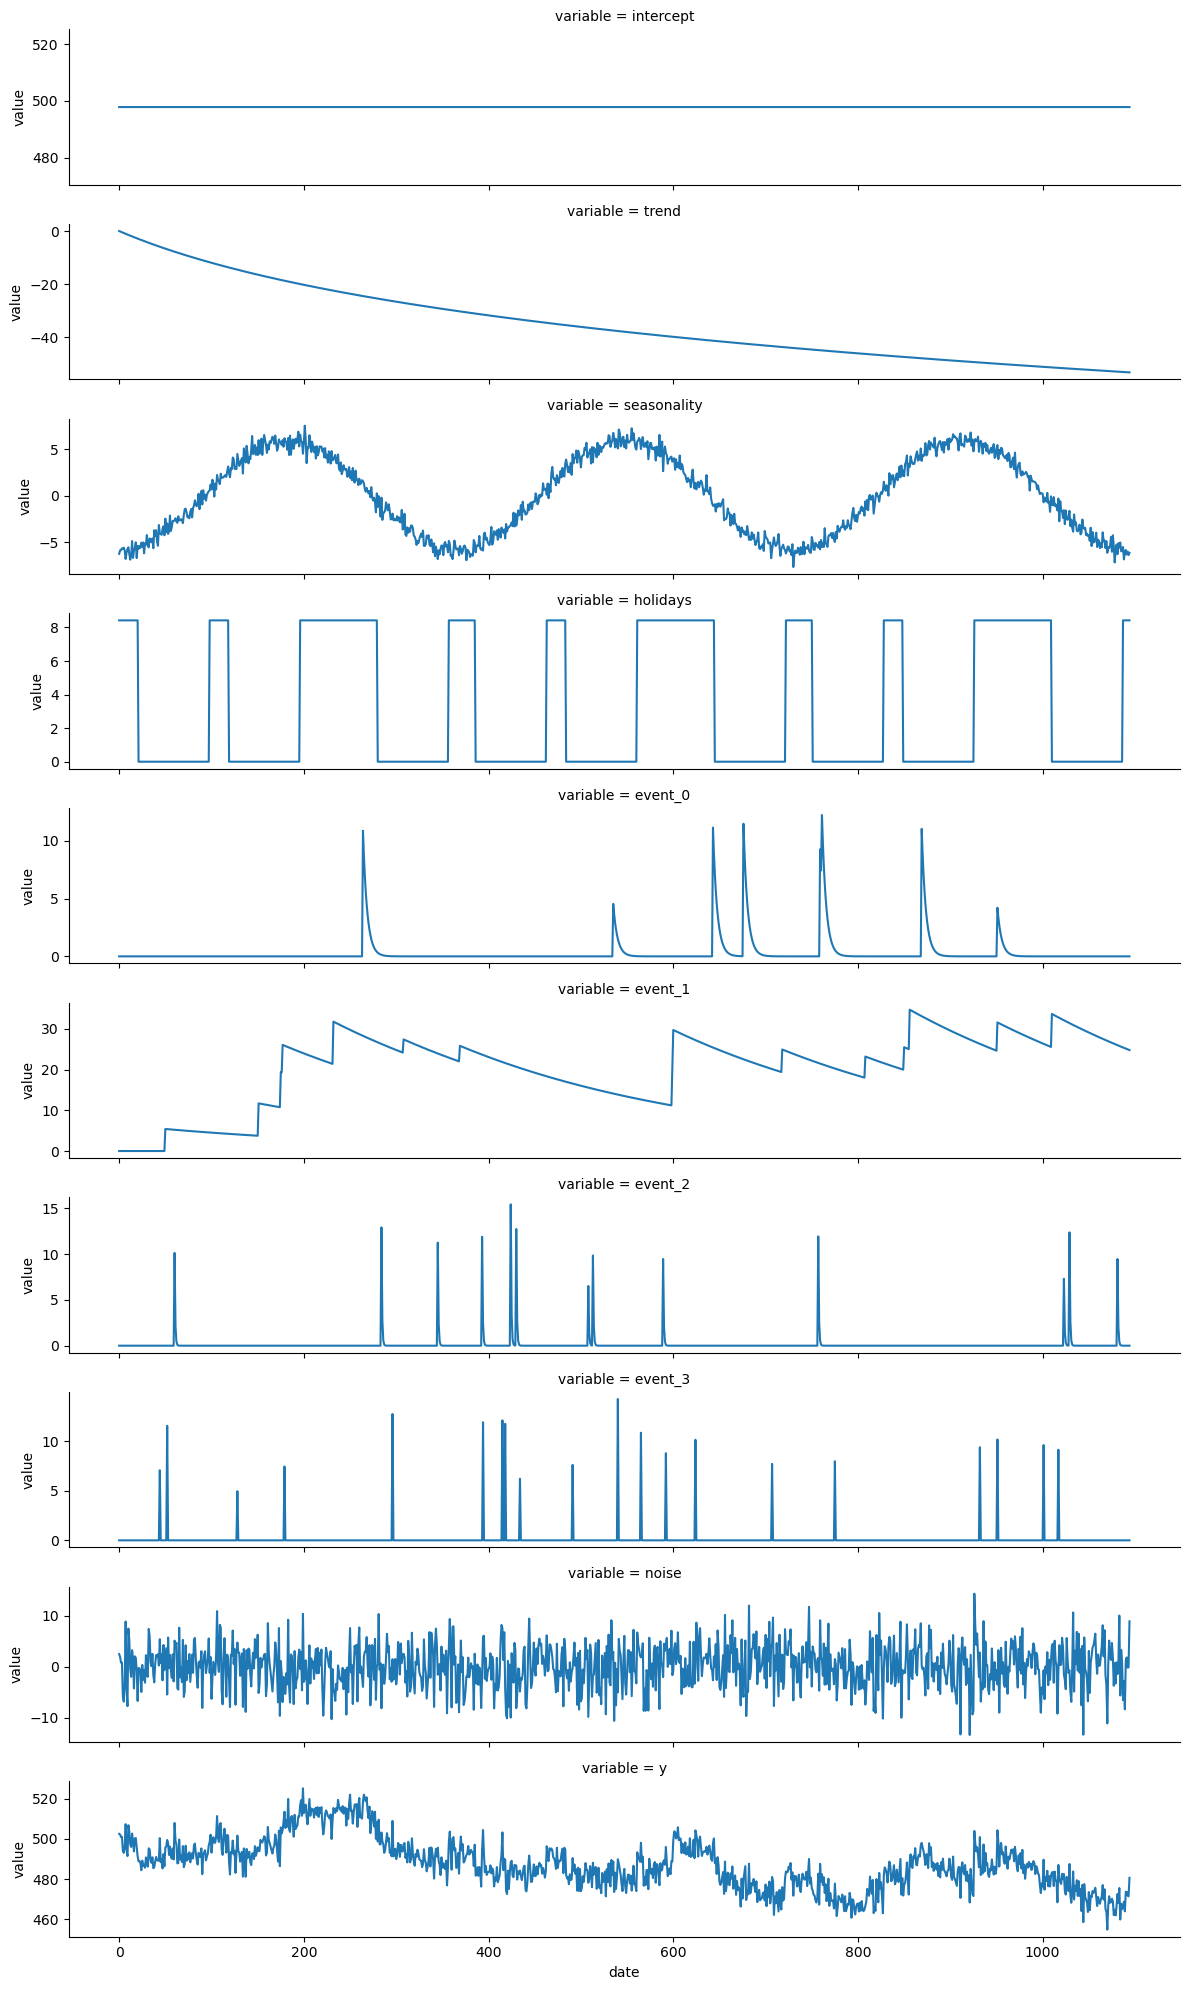

In [17]:

contributions_df = pd.DataFrame(json.loads(response_json['contributions']))
contributions_df['date'] = pd.to_datetime(contributions_df['date'])
for_stacking = contributions_df.drop(columns=['date'])
for_stacking = for_stacking.stack().reset_index()
for_stacking.columns = ['date', 'variable', 'value']

_ = sns.relplot(
    data=for_stacking,
    x="date", y="value", row="variable",
    kind="line", 
    height=2, aspect=6, facet_kws=dict(sharey=False),
)